# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | ed damer
Processing Record 5 of Set 1 | calderitas
Processing Record 6 of Set 1 | bonthe
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | nea moudhania
City not found. Skipping...
Processing Record 9 of Set 1 | savanna-la-mar
Processing Record 10 of Set 1 | juegang
Processing Record 11 of Set 1 | tindouf
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | nicoya
Processing Record 16 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 17 of Set 1 | lachute
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | turpan
Processing Record 21 of Set 1 | wailua ho

Processing Record 37 of Set 4 | tiksi
Processing Record 38 of Set 4 | pekanbaru
Processing Record 39 of Set 4 | abong mbang
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | kerema
Processing Record 42 of Set 4 | tosontsengel
Processing Record 43 of Set 4 | cabedelo
Processing Record 44 of Set 4 | irymple
Processing Record 45 of Set 4 | zhuanghe
Processing Record 46 of Set 4 | yambio
Processing Record 47 of Set 4 | guntur
Processing Record 48 of Set 4 | jurm
Processing Record 49 of Set 4 | sabang
Processing Record 0 of Set 5 | gulf shores
Processing Record 1 of Set 5 | altai
Processing Record 2 of Set 5 | vilyuysk
Processing Record 3 of Set 5 | cranbrook
Processing Record 4 of Set 5 | gargalianoi
Processing Record 5 of Set 5 | shubarshi
Processing Record 6 of Set 5 | nuuk
Processing Record 7 of Set 5 | sao sebastiao
Processing Record 8 of Set 5 | porto novo
Processing Record 9 of Set 5 | ryotsu-minato
Processing Record 10 of Set 5 | ar ruways
Processing Record 11 

Processing Record 30 of Set 8 | jabor
Processing Record 31 of Set 8 | ust'-kut
Processing Record 32 of Set 8 | san andres
Processing Record 33 of Set 8 | toga village
City not found. Skipping...
Processing Record 34 of Set 8 | rio grande
Processing Record 35 of Set 8 | fort leonard wood
Processing Record 36 of Set 8 | safaga
Processing Record 37 of Set 8 | dunedin
Processing Record 38 of Set 8 | gombe
Processing Record 39 of Set 8 | klyuchi
Processing Record 40 of Set 8 | al kharijah
Processing Record 41 of Set 8 | port shepstone
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | oriximina
Processing Record 44 of Set 8 | taltal
Processing Record 45 of Set 8 | nadym
Processing Record 46 of Set 8 | tanout
Processing Record 47 of Set 8 | jakar
Processing Record 48 of Set 8 | ushirombo
Processing Record 49 of Set 8 | quang ngai
Processing Record 0 of Set 9 | mbuji-mayi
Processing Record 1 of Set 9 | greymouth
Processing Record 2 of Set 9 | novyy urengoy
Processing R

Processing Record 17 of Set 12 | villazon
Processing Record 18 of Set 12 | dryden
Processing Record 19 of Set 12 | aberdeen
Processing Record 20 of Set 12 | ludington
Processing Record 21 of Set 12 | sal rei
Processing Record 22 of Set 12 | mangrol
Processing Record 23 of Set 12 | glace bay
Processing Record 24 of Set 12 | dudinka
Processing Record 25 of Set 12 | haimen
Processing Record 26 of Set 12 | mount pearl
Processing Record 27 of Set 12 | uyuni
Processing Record 28 of Set 12 | ayaguz
City not found. Skipping...
Processing Record 29 of Set 12 | mukhorshibir'
City not found. Skipping...
Processing Record 30 of Set 12 | ivdel'
Processing Record 31 of Set 12 | karratha
Processing Record 32 of Set 12 | trutnov
Processing Record 33 of Set 12 | wamba
Processing Record 34 of Set 12 | kuyeda
Processing Record 35 of Set 12 | sao raimundo nonato
Processing Record 36 of Set 12 | port glaud
City not found. Skipping...
Processing Record 37 of Set 12 | xuddur
Processing Record 38 of Set 12 | 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,15.25,44,40,10.29,CL,1707156957
1,waitangi,-43.9535,-176.5597,17.12,94,83,0.89,NZ,1707156945
2,invercargill,-46.4000,168.3500,20.01,66,100,6.71,NZ,1707156958
3,ed damer,17.5928,33.9592,21.82,22,100,5.95,SD,1707156958
4,calderitas,18.5500,-88.2500,28.06,47,40,5.14,MX,1707156958


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,15.25,44,40,10.29,CL,1707156957
1,waitangi,-43.9535,-176.5597,17.12,94,83,0.89,NZ,1707156945
2,invercargill,-46.4000,168.3500,20.01,66,100,6.71,NZ,1707156958
3,ed damer,17.5928,33.9592,21.82,22,100,5.95,SD,1707156958
4,calderitas,18.5500,-88.2500,28.06,47,40,5.14,MX,1707156958


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

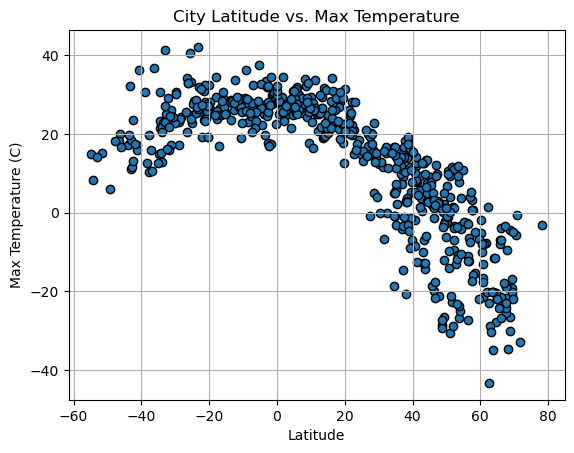

In [16]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

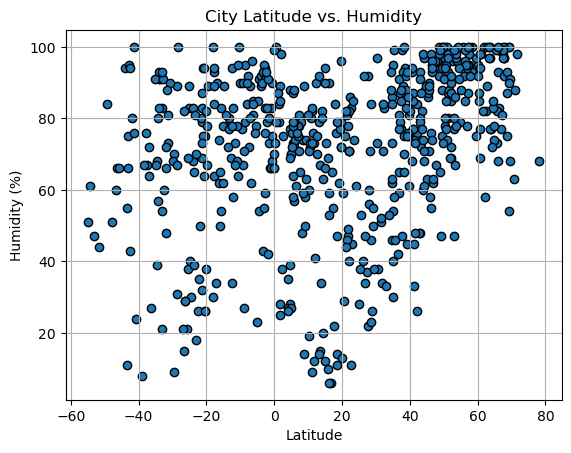

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values_2 = city_data_df["Lat"]
y_values_2 = city_data_df["Humidity"]
plt.scatter(x_values_2, y_values_2, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

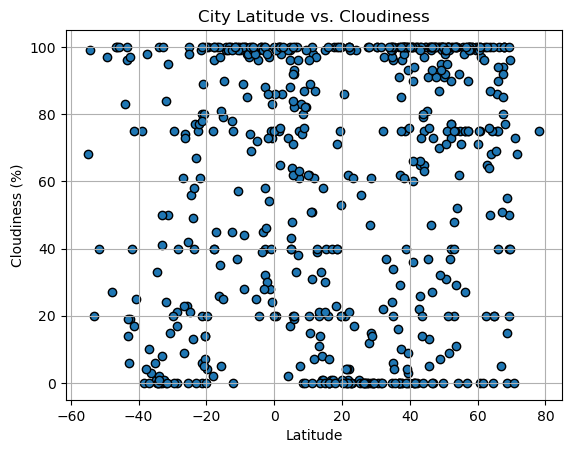

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_values_3 = city_data_df["Lat"]
y_values_3 = city_data_df["Cloudiness"]
plt.scatter(x_values_3, y_values_3, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

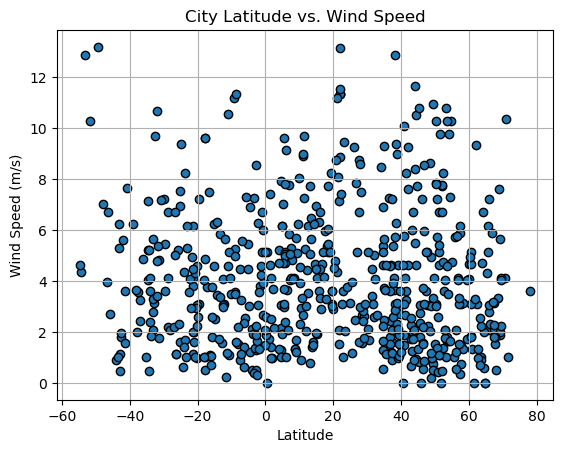

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values_4 = city_data_df["Lat"]
y_values_4 = city_data_df["Wind Speed"]
plt.scatter(x_values_4, y_values_4, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = stats.linregress(x_values_2, y_values_2)
(slope_3, intercept_3, rvalue_3, pvalue_3, stderr_3) = stats.linregress(x_values_3, y_values_3)
(slope_4, intercept_4, rvalue_4, pvalue_4, stderr_4) = stats.linregress(x_values_4, y_values_4)

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[(city_data_df["Lat"] >= 0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ed damer,17.5928,33.9592,21.82,22,100,5.95,SD,1707156958
4,calderitas,18.5500,-88.2500,28.06,47,40,5.14,MX,1707156958
5,bonthe,7.5264,-12.5050,28.79,65,5,5.31,SL,1707156958
7,savanna-la-mar,18.2190,-78.1332,26.97,76,23,5.38,JM,1707156959
8,juegang,32.3174,121.1855,-0.07,83,97,4.08,CN,1707156959


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[(city_data_df["Lat"] < 0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,15.25,44,40,10.29,CL,1707156957
1,waitangi,-43.9535,-176.5597,17.12,94,83,0.89,NZ,1707156945
2,invercargill,-46.4000,168.3500,20.01,66,100,6.71,NZ,1707156958
6,bredasdorp,-34.5322,20.0403,23.20,68,0,4.03,ZA,1707156931
10,blackmans bay,-43.0167,147.3167,11.07,75,14,0.45,AU,1707156960


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7524291492021727


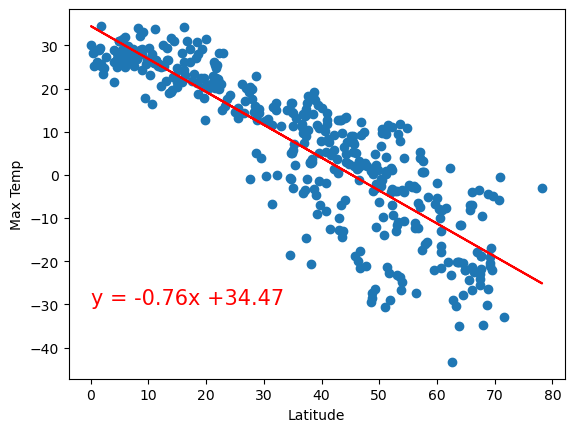

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.23203892295687029


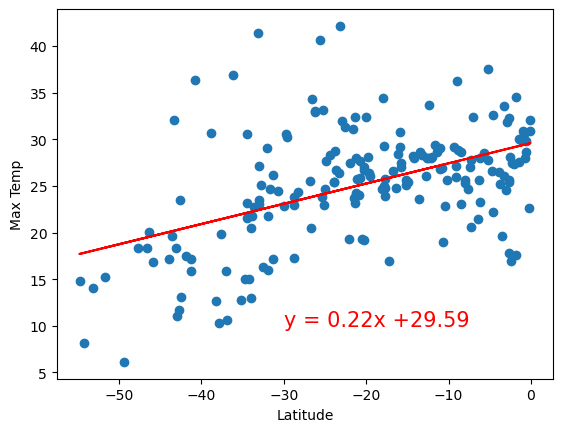

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The linear relationship between latitude and max temp in the northern hemisphere has a negative slope and a r-value close to 1, which indicates that there is a linear association between these variables. As the latitude grows farther from the equator, the max temp decreases. There is no linear relationship between latitude and max temp in the southern hemisphere, which is indicated by the r-value close to 0.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21275134257607975


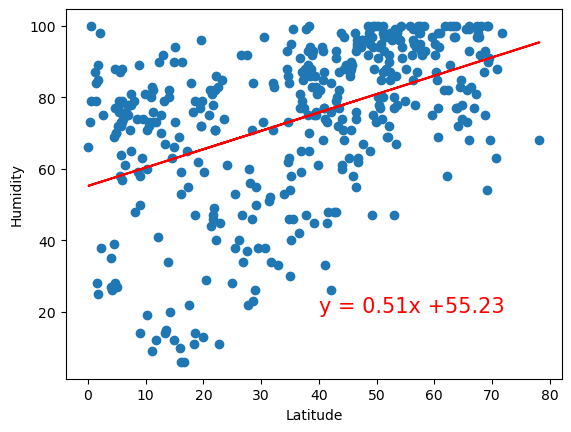

In [62]:
# Northern Hemisphere
x_values_2 = northern_hemi_df["Lat"]
y_values_2 = northern_hemi_df["Humidity"]
(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = stats.linregress(x_values_2, y_values_2)
regress_values_2 = x_values_2 * slope_2 + intercept_2
line_eq_2 = "y = " + str(round(slope_2,2)) + "x +" + str(round(intercept_2,2))

plt.scatter(x_values_2,y_values_2)
plt.plot(x_values_2,regress_values_2,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_2,(40,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue_2**2}")
plt.show()

The r-value is: 0.060128951644778696


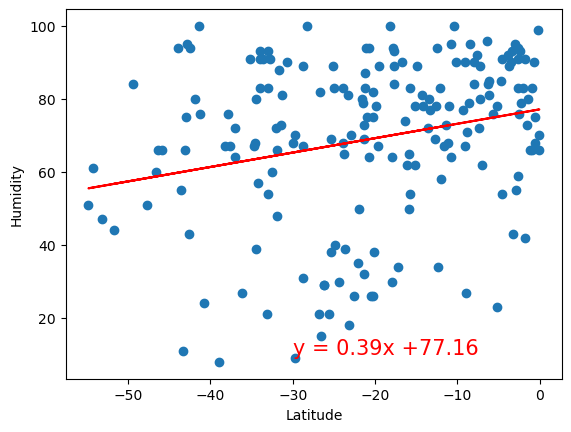

In [63]:
# Southern Hemisphere
x_values_2 = southern_hemi_df["Lat"]
y_values_2 = southern_hemi_df["Humidity"]
(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = stats.linregress(x_values_2, y_values_2)
regress_values_2 = x_values_2 * slope_2 + intercept_2
line_eq_2 = "y = " + str(round(slope_2,2)) + "x +" + str(round(intercept_2,2))

plt.scatter(x_values_2,y_values_2)
plt.plot(x_values_2,regress_values_2,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_2,(-30,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue_2**2}")
plt.show()

**Discussion about the linear relationship:** There is no linear relationship between latitude and humidity in neither the northern hemisphere nor the southern hemisphere, which is indicated by both r-values close to 0. However, there seems to be more cities with high humidity levels in the northern hemisphere vs. the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03193242790844293


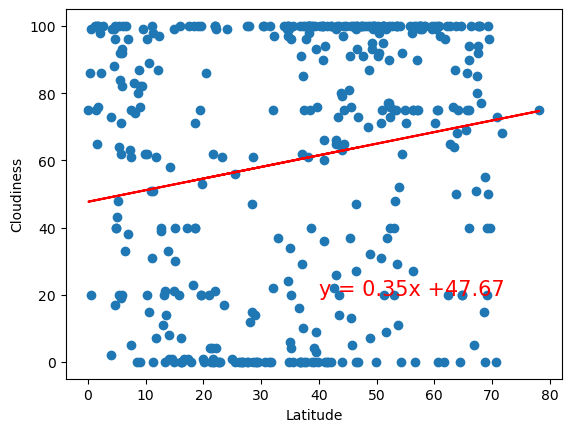

In [72]:
# Northern Hemisphere
x_values_3 = northern_hemi_df["Lat"]
y_values_3 = northern_hemi_df["Cloudiness"]
(slope_3, intercept_3, rvalue_3, pvalue_3, stderr_3) = stats.linregress(x_values_3, y_values_3)
regress_values_3 = x_values_3 * slope_3 + intercept_3
line_eq_3 = "y = " + str(round(slope_3,2)) + "x +" + str(round(intercept_3,2))

plt.scatter(x_values_3,y_values_3)
plt.plot(x_values_3,regress_values_3,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_3,(40,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue_3**2}")
plt.show()

The r-value is: 0.09559482368554713


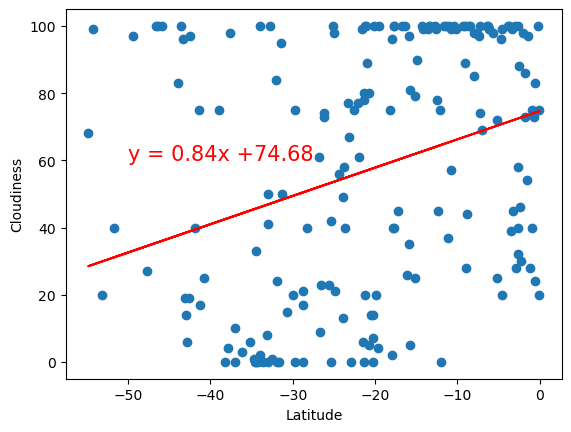

In [73]:
# Southern Hemisphere
x_values_3 = southern_hemi_df["Lat"]
y_values_3 = southern_hemi_df["Cloudiness"]
(slope_3, intercept_3, rvalue_3, pvalue_3, stderr_3) = stats.linregress(x_values_3, y_values_3)
regress_values_3 = x_values_3 * slope_3 + intercept_3
line_eq_3 = "y = " + str(round(slope_3,2)) + "x +" + str(round(intercept_3,2))

plt.scatter(x_values_3,y_values_3)
plt.plot(x_values_3,regress_values_3,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_3,(-50,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue_3**2}")
plt.show()

**Discussion about the linear relationship:** There is no linear relationship between latitude and cloudiness in neither the northern hemisphere nor the southern hemisphere, which is indicated by both r-values close to 0. There appears to be more cloudiness in the cities in the northern hemisphere compared to the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01897260853368919


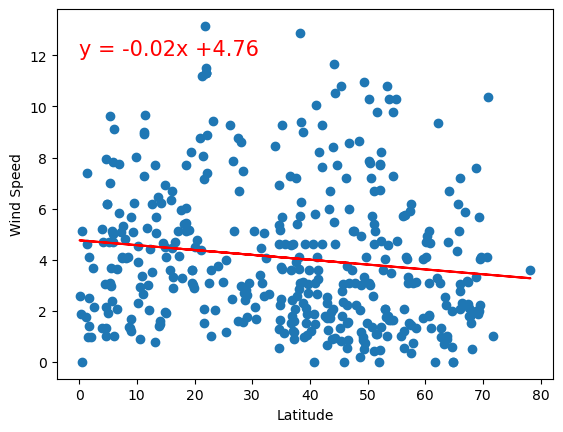

In [77]:
# Northern Hemisphere
x_values_4 = northern_hemi_df["Lat"]
y_values_4 = northern_hemi_df["Wind Speed"]
(slope_4, intercept_4, rvalue_4, pvalue_4, stderr_4) = stats.linregress(x_values_4, y_values_4)
regress_values_4 = x_values_4 * slope_4 + intercept_4
line_eq_4 = "y = " + str(round(slope_4,2)) + "x +" + str(round(intercept_4,2))

plt.scatter(x_values_4,y_values_4)
plt.plot(x_values_4,regress_values_4,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_4,(0,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue_4**2}")
plt.show()

The r-value is: 0.031128531584174023


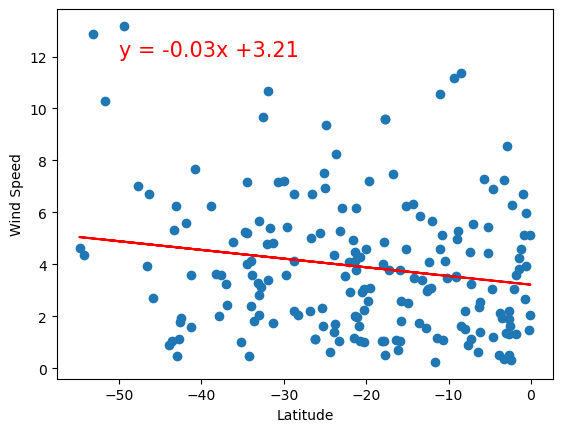

In [80]:
# Southern Hemisphere
x_values_4 = southern_hemi_df["Lat"]
y_values_4 = southern_hemi_df["Wind Speed"]
(slope_4, intercept_4, rvalue_4, pvalue_4, stderr_4) = stats.linregress(x_values_4, y_values_4)
regress_values_4 = x_values_4 * slope_4 + intercept_4
line_eq_4 = "y = " + str(round(slope_4,2)) + "x +" + str(round(intercept_4,2))

plt.scatter(x_values_4,y_values_4)
plt.plot(x_values_4,regress_values_4,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_4,(-50,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue_4**2}")
plt.show()

**Discussion about the linear relationship:** There is no linear relationship between latitude and wind speed in neither the northern hemisphere nor the southern hemisphere, which is indicated by both r-values close to 0. In comparison, the northern hemisphere seems to have more cities with high wind speed vs. the cities in the southern hemisphere.